## Arima model in predicting reliance stock price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

## Loading dataset

In [2]:
df=pd.read_csv('RELIANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df= df[['Close']].dropna()

## Visualising the data

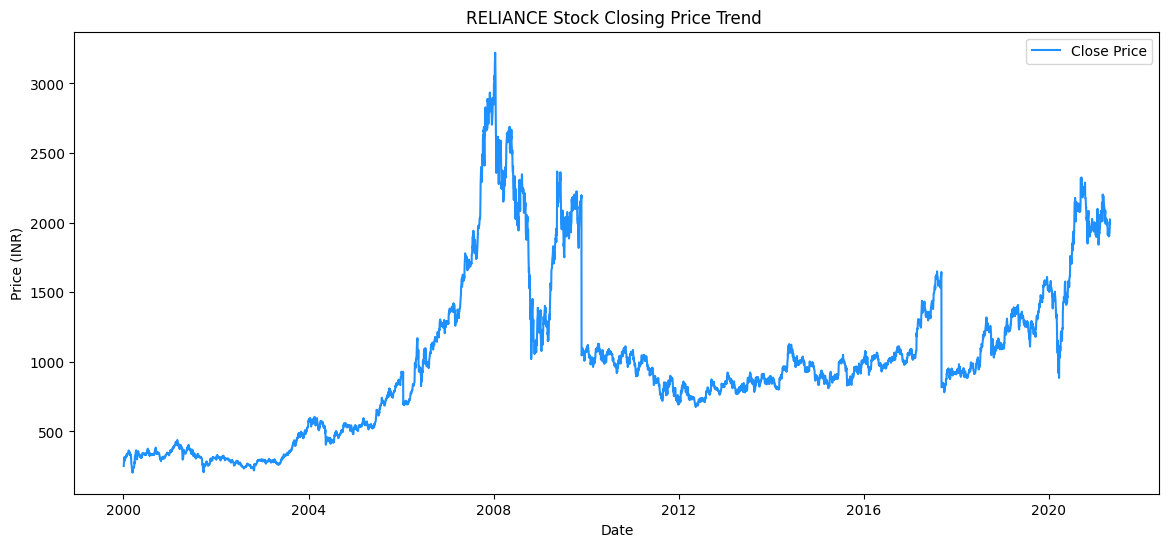

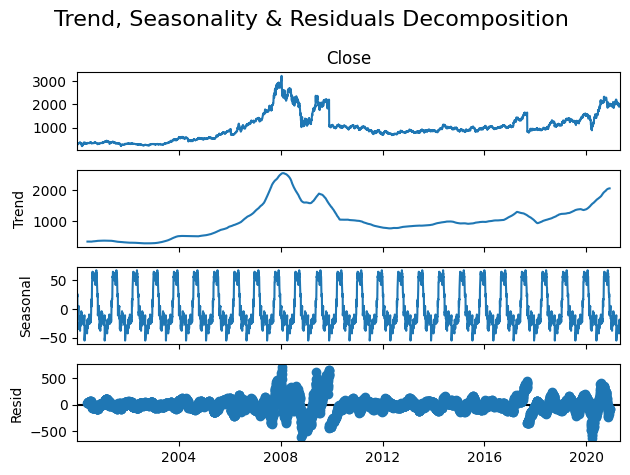

In [4]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='dodgerblue')
plt.title("RELIANCE Stock Closing Price Trend ")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()

# Decomposition to show trend, seasonality, residuals
decomposition = seasonal_decompose(df['Close'], model='additive', period=200)
decomposition.plot()
plt.suptitle("Trend, Seasonality & Residuals Decomposition ", fontsize=16)
plt.tight_layout()
plt.show()

## Predicting the next day price

In [5]:
train = df['Close'][:-1]  # exclude last day

# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast the next day
forecast = model_fit.forecast(steps=1)
next_day_price = forecast.iloc[0]
last_price = df['Close'].iloc[-2]
actual_next_day = df['Close'].iloc[-1]

print(f"\n Last Closing Price: ₹{last_price:.2f}")
print(f"Predicted Next Day Price: ₹{next_day_price:.2f}")
print(f"Actual Next Day Price: ₹{actual_next_day:.2f}")


 Last Closing Price: ₹2024.05
Predicted Next Day Price: ₹2020.45
Actual Next Day Price: ₹1994.50


## Direction

In [6]:
direction = "UP " if next_day_price > last_price else "DOWN "
print(f"\n Predicted Direction: {direction}")


 Predicted Direction: DOWN 


## Volitility Estimation

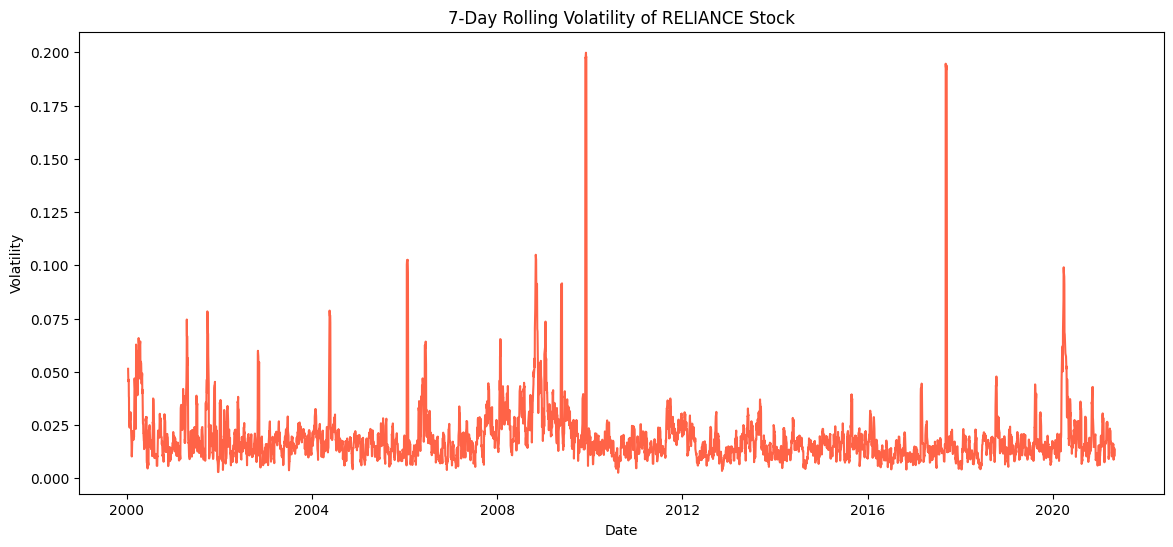

In [7]:
df['Returns'] = df['Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=7).std()

plt.figure(figsize=(14,6))
plt.plot(df['Volatility'], color='tomato')
plt.title("7-Day Rolling Volatility of RELIANCE Stock")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, r2_score
import numpy as np
import math

# 1. PRICE PREDICTION METRICS 

actual_price = df['Close'].iloc[-1]
mae = mean_absolute_error([actual_price], [next_day_price])
rmse = math.sqrt(mean_squared_error([actual_price], [next_day_price]))

print("\n Price Prediction Metrics:")
print(f" MAE: {mae:.4f}")
print(f" RMSE: {rmse:.4f}")

# 2. DIRECTION PREDICTION METRICS 

true_direction = int(actual_price > last_price)
pred_direction = int(next_day_price > last_price)

accuracy = accuracy_score([true_direction], [pred_direction])
f1 = f1_score([true_direction], [pred_direction],zero_division=1)

print("\n Direction Prediction Metrics:")
print(f" Accuracy: {accuracy:.4f}")
print(f" F1 Score: {f1:.4f}")

# 3. VOLATILITY METRICS 

N = 5
log_returns = np.log(df['Close'] / df['Close'].shift(1)).dropna()

# Compute realized volatility
realized_volatility = log_returns.rolling(window=N).apply(lambda x: np.sqrt(np.mean(x**2)))

# Actual volatility at t (last value)
actual_vol = realized_volatility.iloc[-1]

# Now predict volatility using past 5 returns (you can try modeling this)
# Let's say we use the mean of previous rolling vol as a "naive" prediction
predicted_vol = realized_volatility.iloc[-2]  # use previous as predicted for today

vol_rmse = math.sqrt(mean_squared_error([actual_vol], [predicted_vol]))
vol_r2 = r2_score([actual_vol], [predicted_vol])

print("\n Volatility Prediction Metrics:")
print(f" Realized Volatility (t): {actual_vol:.6f}")
print(f"RMSE: {vol_rmse:.6f}")


 Price Prediction Metrics:
 MAE: 25.9514
 RMSE: 25.9514

 Direction Prediction Metrics:
 Accuracy: 1.0000
 F1 Score: 1.0000

 Volatility Prediction Metrics:
 Realized Volatility (t): 0.016648
RMSE: 0.001347
